In [1]:
import os as os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
training_data_dir = r".\Data\Spirals\data2\spiral\training"
testing_data_dir = r".\Data\Spirals\data2\spiral\testing"

In [3]:
data = tf.keras.utils.image_dataset_from_directory(training_data_dir)

Found 73 files belonging to 2 classes.


In [4]:
validation_data = tf.keras.utils.image_dataset_from_directory(testing_data_dir)

Found 30 files belonging to 2 classes.


## Checking the data

In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
batch[0].shape

(32, 256, 256, 3)

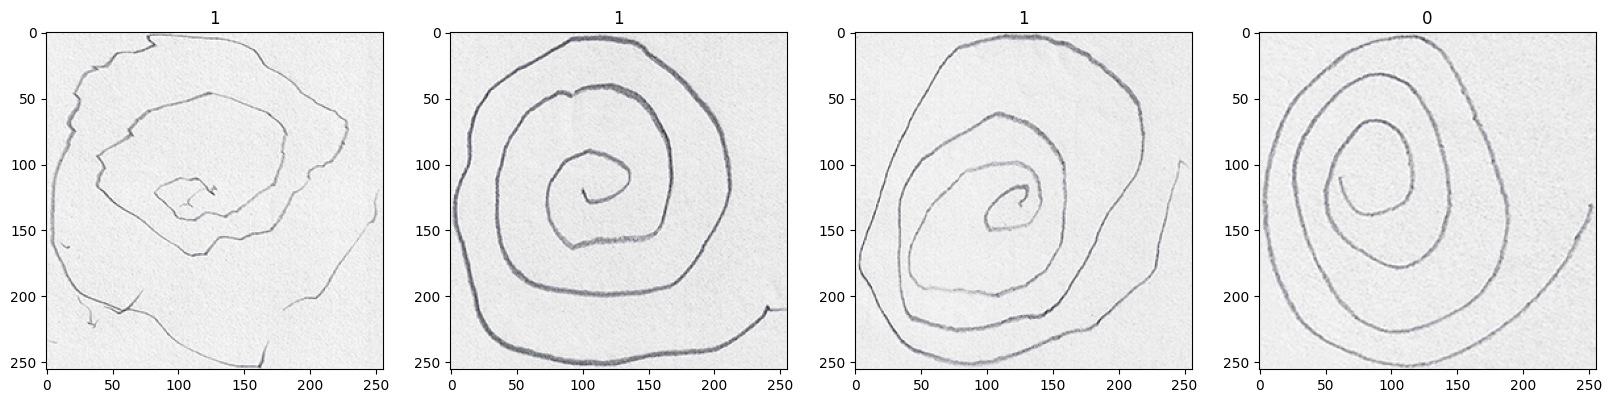

In [8]:
# Healthy = 0
# Parkinson's = 1

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data_iterator_val = validation_data.as_numpy_iterator()

In [10]:
batch_val = data_iterator_val.next()

In [11]:
batch_val[0].shape

(30, 256, 256, 3)

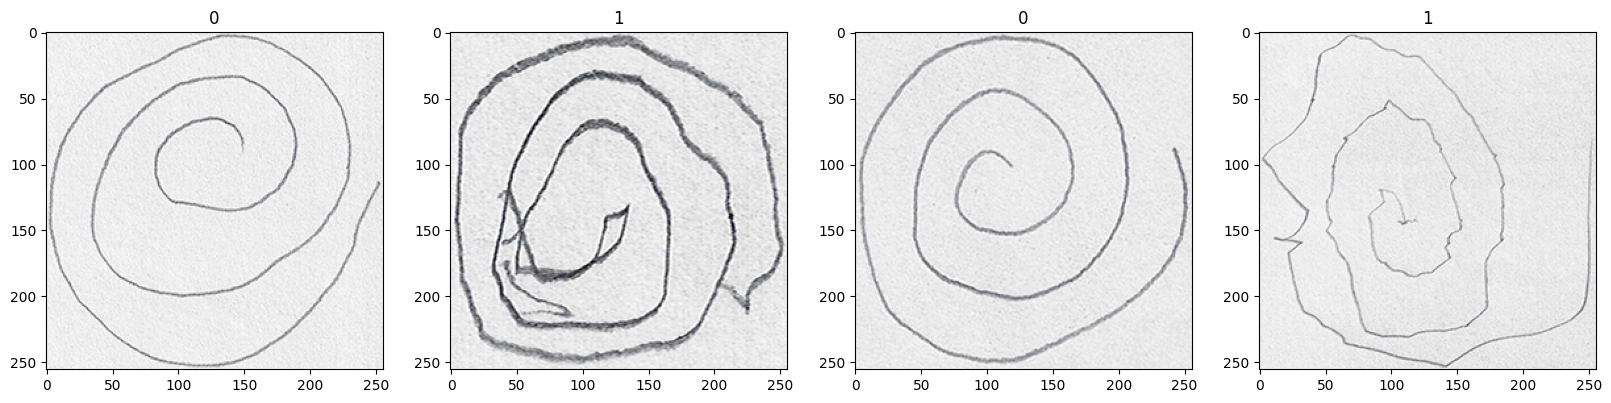

In [12]:
# Healthy = 0
# Parkinson's = 1

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_val[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_val[1][idx])

# Preparing the data

In [13]:
""" 
The function takes an tensorflow mapdataset object and performs preprocessing on it. It then returns a preprocessed object.
"""

def data_prep(data):
    data = data.map(lambda x, y: (x/255, y))
    
    return data

In [14]:
prepped_train = data_prep(data)
prepped_test = data_prep(validation_data)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
prepped_iterator = prepped_train.as_numpy_iterator()
prepped_iterator.next()

(array([[[[0.92941177, 0.92941177, 0.92941177],
          [0.92941177, 0.92941177, 0.92941177],
          [0.9372549 , 0.9372549 , 0.9372549 ],
          ...,
          [0.92156863, 0.92156863, 0.92156863],
          [0.91764706, 0.91764706, 0.91764706],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         [[0.93333334, 0.93333334, 0.93333334],
          [0.92156863, 0.92156863, 0.92156863],
          [0.92941177, 0.92941177, 0.92941177],
          ...,
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9098039 , 0.9098039 , 0.9098039 ]],
 
         [[0.9254902 , 0.9254902 , 0.9254902 ],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          [0.92941177, 0.92941177, 0.92941177],
          ...,
          [0.92156863, 0.92156863, 0.92156863],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          [0.91764706, 0.91764706, 0.91764706]],
 
         ...,
 
         [[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.91764

In [16]:
prepped_iterator_test = prepped_test.as_numpy_iterator()
prepped_iterator_test.next()

(array([[[[0.9372549 , 0.9372549 , 0.9372549 ],
          [0.92941177, 0.92941177, 0.92941177],
          [0.92941177, 0.92941177, 0.92941177],
          ...,
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         [[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.93333334, 0.93333334, 0.93333334],
          [0.95686275, 0.95686275, 0.95686275],
          ...,
          [0.92156863, 0.92156863, 0.92156863],
          [0.9372549 , 0.9372549 , 0.9372549 ],
          [0.9529412 , 0.9529412 , 0.9529412 ]],
 
         [[0.92941177, 0.92941177, 0.92941177],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          ...,
          [0.90588236, 0.90588236, 0.90588236],
          [0.91764706, 0.91764706, 0.91764706],
          [0.9529412 , 0.9529412 , 0.9529412 ]],
 
         ...,
 
         [[0.9411765 , 0.9411765 , 0.9411765 ],
          [0.93333

## Modelling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training

In [22]:
hist = model.fit(prepped_train, epochs=20, validation_data=prepped_test)

Epoch 1/20
3/3 [==============================] - 2s 422ms/step - loss: 5.7508 - accuracy: 0.5205 - val_loss: 0.9686 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 1s 377ms/step - loss: 0.8539 - accuracy: 0.5068 - val_loss: 0.7785 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 390ms/step - loss: 0.7750 - accuracy: 0.4932 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 373ms/step - loss: 0.7212 - accuracy: 0.5068 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 1s 379ms/step - loss: 0.7016 - accuracy: 0.4384 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 1s 382ms/step - loss: 0.6909 - accuracy: 0.6301 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 1s 382ms/step - loss: 0.6901 - accuracy: 0.5068 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 8/20
3/3 [====

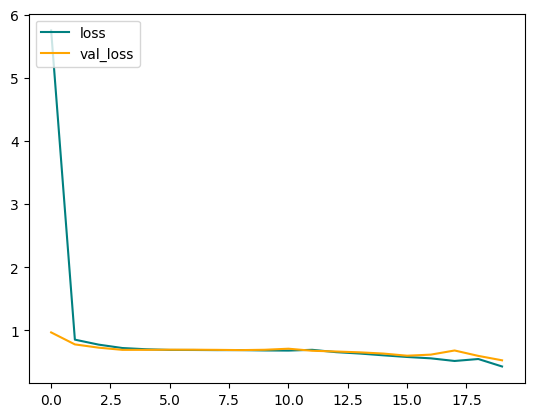

In [23]:
fig = plt.Figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

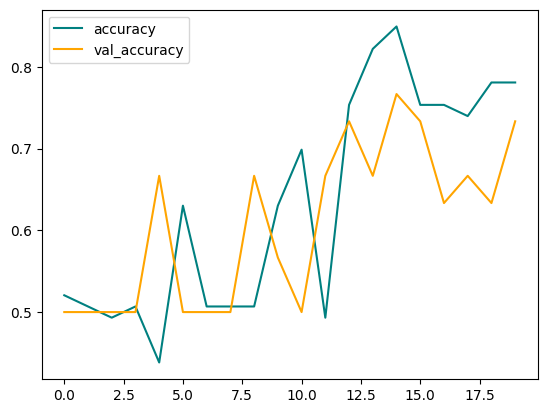

In [24]:
fig = plt.Figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()